<a href="https://colab.research.google.com/github/raoshailesh/loginpage/blob/main/Red_wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


# reading the file winequality-red.csv

wineQuality_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')
print(wineQuality_red.shape)

(1599, 12)


In [ ]:
# reading the file winequality-white.csv

wineQuality_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')
print(wineQuality_white.shape)

(4898, 12)


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(wineQuality_red)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
wineQuality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wineQuality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


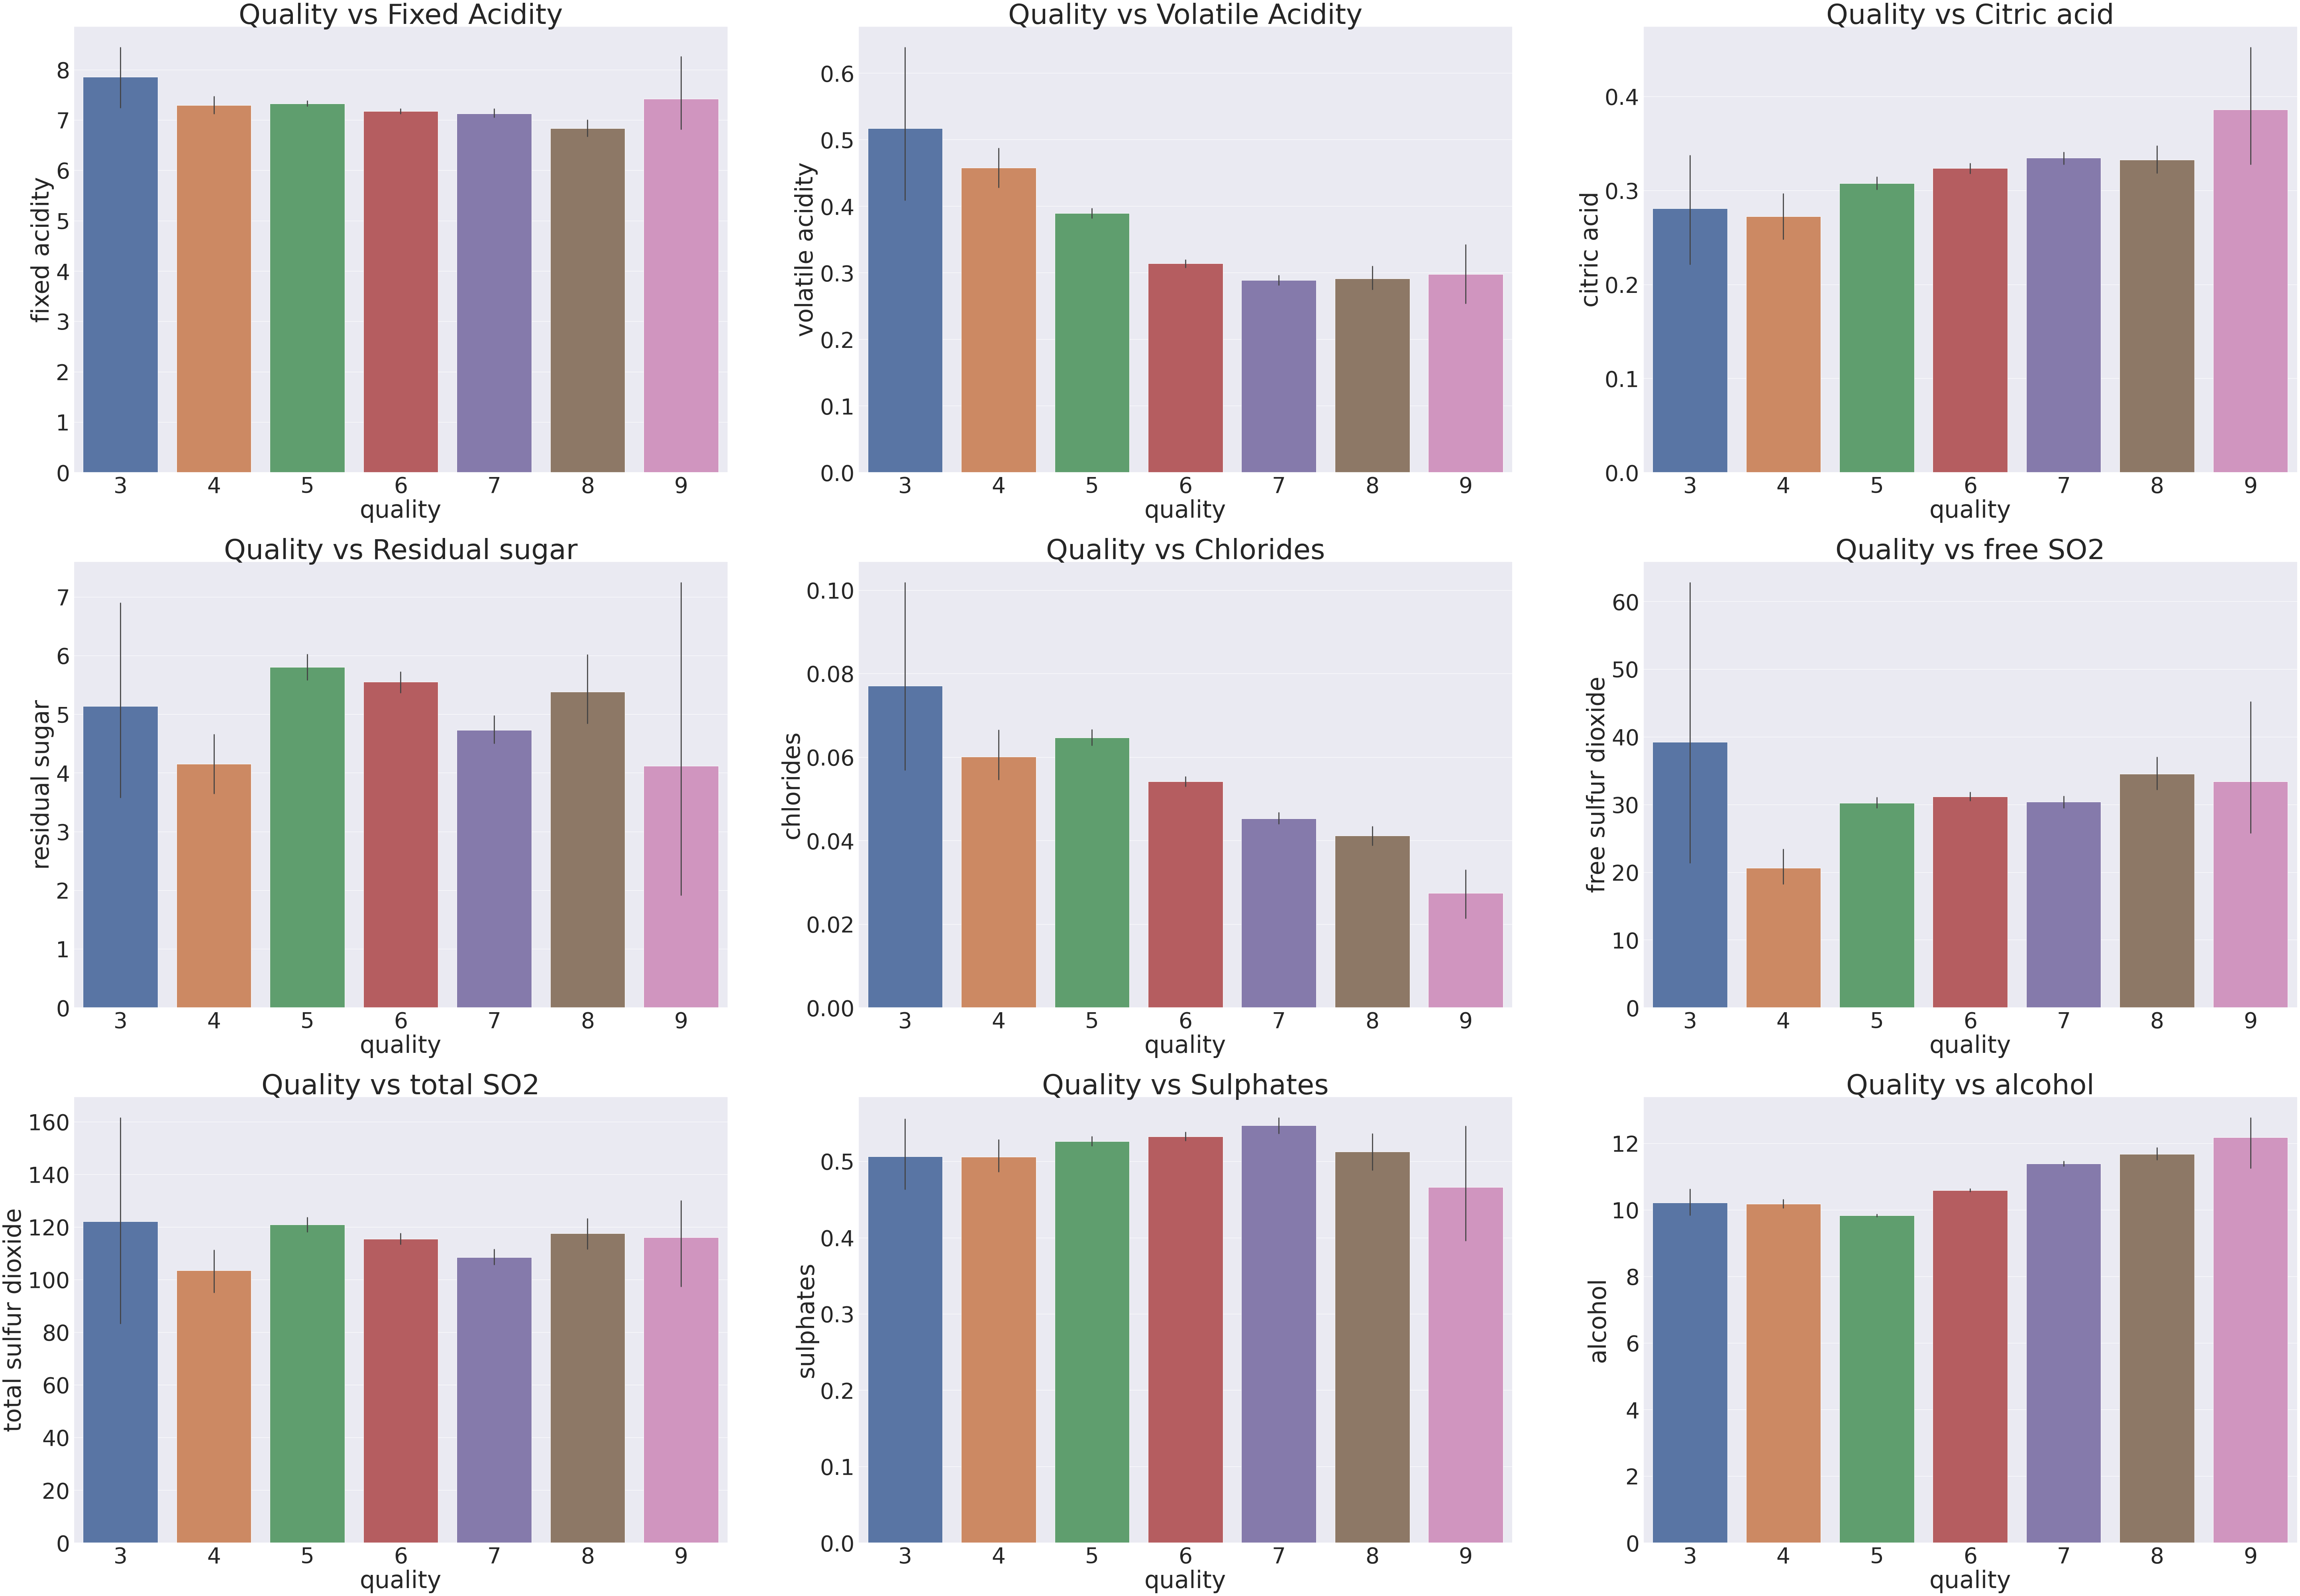

In [ ]:
frames = [wineQuality_red, wineQuality_white]
  
result = pd.concat(frames, ignore_index=True)
df = result.copy()

plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [ ]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df = wineQuality_red
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
samples = scaling.fit_transform(df[df.columns])
dataframe = pd.DataFrame(samples)

print(df.columns.values)


['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


✅**Multiclass classification using SVC (support vector machine)**


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119, 1)
(480, 11)
(480, 1)


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array([6, 6, 5, ..., 5, 7, 5])

In [ ]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [ ]:
import numpy as np
print(y_pred)

[6 5 6 5 6 5 5 6 5 5 5 5 6 5 5 6 7 6 6 5 6 5 6 5 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 6 7 6 5 5 6 5 6 5 5 6 7 6 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 6 5 6 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 6 6 6 5 6 5 5 6 6 5 5 6 6 5 5 6 6 7 5 6 5 6 5 6 5 5 5 5 6 6 6
 6 5 6 6 5 6 6 6 5 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 5 6 6 6 6 7 6 5 5 7 5 6 6
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 6 5 5 5 6
 6 6 5 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 6 5 7 5 5 5 5 5 5 6 6 6 6 5 6 6 6 6 5 6 6 5 6 6 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 6 6 6 5 6 5 6 6 6 5 5 6 5 5 5 6 5 5
 6 5 6 6 5 5 5 5 5 5 6 6 5 5 5 5 6 6 6 5 6 7 5 6 6 6 6 5 6 5 6 5 5 5 6 5 5
 6 5 5 6 5 5 6 6 6 6 6 6 5 5 5 6 6 5 6 5 6 5 5 6 5 6 5 6 6 5 5 5 5 5 5 5 6
 6 5 6 5 5 5 6 6 5 6 5 5 6 6 6 6 6 5 6 5 6 5 5 5 6 5 6 6 6 6 6 5 5 6 5 6 5
 6 5 5 7 5 5 6 5 6 6 6 5 6 5 6 5 5 6 5 5 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5]


In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   3   0   0   0]
 [  0   0  11   4   0   0]
 [  0   0 165  43   0   0]
 [  0   0  68 131   5   0]
 [  0   0   2  39   4   0]
 [  0   0   0   4   1   0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.28
Macro Recall: 0.25
Macro F1-score: 0.25

Weighted Precision: 0.58
Weighted Recall: 0.62
Weighted F1-score: 0.59

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        15
     Class 5       0.66      0.79      0.72       208
     Class 6       0.59      0.64      0.62       204
     Class 7       0.40      0.09      0.15        45
     Class 8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.25      0.25       480
weighted avg       0.58      0.62      0.59       480



**End of SVC✅**

✅**One-hot-encoding**

In [ ]:
#Use get_dummies method from panda class to create dummy variable and store those in dummies
dummies = pd.get_dummies(df['quality'])
print(df['quality'])
dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8']
print(dummies)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8
0             0          0          1          0          0          0
1             0          0          1          0          0          0
2             0          0          1          0          0          0
3             0          0          0          1          0          0
4             0          0          1          0          0          0
...         ...        ...        ...        ...        ...        ...
1594          0          0          1          0          0          0
1595          0          0          0          1          0          0
1596          0          0          0          1          0          0
1597          0          0          1          0          0          0
1598          0          0          0          1          0        

In [ ]:
dataframe = dataframe.drop(columns=[11])
print(dataframe)

            0         1     2   ...        8         9         10
0     0.247788  0.397260  0.00  ...  0.606299  0.137725  0.153846
1     0.283186  0.520548  0.00  ...  0.362205  0.209581  0.215385
2     0.283186  0.438356  0.04  ...  0.409449  0.191617  0.215385
3     0.584071  0.109589  0.56  ...  0.330709  0.149701  0.215385
4     0.247788  0.397260  0.00  ...  0.606299  0.137725  0.153846
...        ...       ...   ...  ...       ...       ...       ...
1594  0.141593  0.328767  0.08  ...  0.559055  0.149701  0.323077
1595  0.115044  0.294521  0.10  ...  0.614173  0.257485  0.430769
1596  0.150442  0.267123  0.13  ...  0.535433  0.251497  0.400000
1597  0.115044  0.359589  0.12  ...  0.653543  0.227545  0.276923
1598  0.123894  0.130137  0.47  ...  0.511811  0.197605  0.400000

[1599 rows x 11 columns]


In [ ]:
dataframe.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'
, 'chlorides' ,'free sulfur dioxide' ,'total sulfur dioxide' ,'density' ,'pH'
 ,'sulphates', 'alcohol']

print(dataframe)

      fixed acidity  volatile acidity  ...  sulphates   alcohol
0          0.247788          0.397260  ...   0.137725  0.153846
1          0.283186          0.520548  ...   0.209581  0.215385
2          0.283186          0.438356  ...   0.191617  0.215385
3          0.584071          0.109589  ...   0.149701  0.215385
4          0.247788          0.397260  ...   0.137725  0.153846
...             ...               ...  ...        ...       ...
1594       0.141593          0.328767  ...   0.149701  0.323077
1595       0.115044          0.294521  ...   0.257485  0.430769
1596       0.150442          0.267123  ...   0.251497  0.400000
1597       0.115044          0.359589  ...   0.227545  0.276923
1598       0.123894          0.130137  ...   0.197605  0.400000

[1599 rows x 11 columns]


In [ ]:
final_dataframe = pd.concat([dataframe,dummies], axis=1)
print(final_dataframe)

      fixed acidity  volatile acidity  ...  quality_7  quality_8
0          0.247788          0.397260  ...          0          0
1          0.283186          0.520548  ...          0          0
2          0.283186          0.438356  ...          0          0
3          0.584071          0.109589  ...          0          0
4          0.247788          0.397260  ...          0          0
...             ...               ...  ...        ...        ...
1594       0.141593          0.328767  ...          0          0
1595       0.115044          0.294521  ...          0          0
1596       0.150442          0.267123  ...          0          0
1597       0.115044          0.359589  ...          0          0
1598       0.123894          0.130137  ...          0          0

[1599 rows x 17 columns]


✅**Analysis using SLP**

In [ ]:
import math
def hypothesis(w,dataset):
  y=w[0]
  sample =dataset
  sample = np.concatenate([[1], sample])
  y = np.multiply(w, sample)
  y = np.sum(y)
  gx = 1/(1+(math.e)**(-1*y))
  return gx

In [ ]:
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, dataset[i][:-6]))
  
  return np.array(predicted)

In [ ]:
# to calculate mean square error
def accuracy(predicted, dataset):
  correctly_predicted = 0
  # print("in accuracy class", predicted)
  # print(dataset)
  # print('--------------------------------------------')

  for i in range(len(predicted[0])):
    predicted_values=[0, 0, 0, 0, 0, 0]
    for k in range(6):
      predicted_values[k]=predicted[k][i]
    index = predicted_values.index(max(predicted_values))
    # print("index ...", index)
    if dataset[i][-6 + index] == 1:
      correctly_predicted += 1
  return correctly_predicted/len(predicted[0])

In [ ]:
# to update w using stochastic gradient decendent
def update_parameter_stochastic(w, alpha, dataset):
  np.random.shuffle(dataset)
  m = len(dataset)
  for j in range(m):
    for k in range(6):
      hy = hypothesis(w[k], np.array(dataset[j][:-6]))
      w[k][0] = w[k][0] - (alpha)*(hy- dataset[:, -6+k][j])*hy*(1-hy)
      for i in range(1, 12):
        w[k][i] = w[k][i] - (alpha)*((hy- dataset[:, -6+k][j])* dataset[:, i-1][j])*hy*(1-hy)
  return w

In [ ]:
import matplotlib.pyplot as plt
def SLP(epoch, alpha, rho, w, train_dataset, validation_dataset):
  pre_accuracy = 0
  curr_accuracy = 0
  trains_accuracy=[]
  validation_accuracy = []
  for itr in range(epoch):
    predicted=[]
    for k in range(6):
      predict = predicted_values(w[k], train_dataset)
      predicted.append(predict)

    curr_accuracy = accuracy(predicted, train_dataset)
    w = update_parameter_stochastic(w, alpha, train_dataset)
    
    trains_accuracy.append(curr_accuracy)
    predicted=[]
    for k in range(len(w)):
      predict = predicted_values(w[k], validation_dataset)
      predicted.append(predict)
    validation_accuracy.append(accuracy(predicted, validation_dataset))

    if abs(curr_accuracy - pre_accuracy) <= rho:
      break;
    pre_accuracy = curr_accuracy
  epochs = [i for i in range(len(validation_accuracy))]
  # fig, ax = plt.subplots()
  # ax.plot(epochs, trains_accuracy)
  # ax.plot(epochs, validation_accuracy)
  return w, curr_accuracy, validation_accuracy[-1]

In [ ]:
train_datasets = final_dataframe.sample(frac=0.3)
dataframe = final_dataframe.drop(train_datasets.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

In [ ]:
alpha = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epoch = 50
p = 0.0003
for al in alpha:
  w=[[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1]]
  w, trains_accuracy, validation_accuracy = SLP(epoch, al, p, w, train_datasets.to_numpy(), validation_dataset.to_numpy())
  predicted=[]
  for k in range(len(w)):
    predict = predicted_values(w[k], test_dataset.to_numpy())
    predicted.append(predict)
  test_accuracy = accuracy(predicted, test_dataset.to_numpy())
  print("\n\n\nFor Alpha : ", al)
  print("Train Accuracy : ",trains_accuracy , "\nValidation MSE : ", validation_accuracy, "\nTest accuracy : ", test_accuracy)




For Alpha :  0.1
Train Accuracy :  0.4583333333333333 
Validation MSE :  0.50625 
Test accuracy :  0.5307612095933264



For Alpha :  0.2
Train Accuracy :  0.6104166666666667 
Validation MSE :  0.5625 
Test accuracy :  0.5443169968717414



For Alpha :  0.3
Train Accuracy :  0.5604166666666667 
Validation MSE :  0.5 
Test accuracy :  0.502606882168926



For Alpha :  0.5
Train Accuracy :  0.6 
Validation MSE :  0.5125 
Test accuracy :  0.5015641293013556



For Alpha :  0.6
Train Accuracy :  0.6020833333333333 
Validation MSE :  0.51875 
Test accuracy :  0.5057351407716372



For Alpha :  0.7
Train Accuracy :  0.61875 
Validation MSE :  0.55 
Test accuracy :  0.5401459854014599



For Alpha :  0.8
Train Accuracy :  0.60625 
Validation MSE :  0.6 
Test accuracy :  0.5672575599582899



For Alpha :  0.9
Train Accuracy :  0.6291666666666667 
Validation MSE :  0.54375 
Test accuracy :  0.5391032325338895



For Alpha :  1
Train Accuracy :  0.6541666666666667 
Validation MSE :  0.55625 


**✅Preparing dataset to final checking of SLP**

In [ ]:
tr_dataframe = pd.concat([X_train, y_train], axis = 1)
te_dataframe = pd.concat([X_test, y_test], axis = 1)
print(tr_dataframe)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
92              8.6             0.490         0.29  ...       1.98      9.8        5
1017            8.0             0.180         0.37  ...       0.44     12.7        6
1447            6.8             0.670         0.00  ...       0.74      9.7        5
838            10.1             0.310         0.35  ...       0.83     11.2        7
40              7.3             0.450         0.36  ...       0.83     10.5        5
...             ...               ...          ...  ...        ...      ...      ...
763             9.3             0.655         0.26  ...       0.42      9.6        5
835             7.6             0.665         0.10  ...       0.51      9.3        5
1216            7.9             0.570         0.31  ...       0.69      9.5        6
559            13.0             0.470         0.49  ...       0.68     12.7        6
684             9.8             0.980         0.32  ...       0.4

In [ ]:

samples1 = scaling.fit_transform(tr_dataframe[tr_dataframe.columns])
train_dataframe = pd.DataFrame(samples1)
train_dataframe.columns = tr_dataframe.columns

samples2 = scaling.fit_transform(te_dataframe[te_dataframe.columns])
test_dataframe = pd.DataFrame(samples2)
test_dataframe.columns = te_dataframe.columns

In [ ]:
train_dummies = pd.get_dummies(train_dataframe['quality'])
train_dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8']
print(train_dummies)

      quality_3  quality_4  quality_5  quality_6  quality_7  quality_8
0             0          0          1          0          0          0
1             0          0          0          1          0          0
2             0          0          1          0          0          0
3             0          0          0          0          1          0
4             0          0          1          0          0          0
...         ...        ...        ...        ...        ...        ...
1114          0          0          1          0          0          0
1115          0          0          1          0          0          0
1116          0          0          0          1          0          0
1117          0          0          0          1          0          0
1118          0          0          1          0          0          0

[1119 rows x 6 columns]


In [ ]:
train_dataframe = pd.concat([train_dataframe.iloc[:, :-1],train_dummies], axis=1)
print(train_dataframe)

      fixed acidity  volatile acidity  ...  quality_7  quality_8
0          0.348214          0.253425  ...          0          0
1          0.294643          0.041096  ...          0          0
2          0.187500          0.376712  ...          0          0
3          0.482143          0.130137  ...          1          0
4          0.232143          0.226027  ...          0          0
...             ...               ...  ...        ...        ...
1114       0.410714          0.366438  ...          0          0
1115       0.258929          0.373288  ...          0          0
1116       0.285714          0.308219  ...          0          0
1117       0.741071          0.239726  ...          0          0
1118       0.455357          0.589041  ...          0          0

[1119 rows x 17 columns]


In [ ]:
test_dummies = pd.get_dummies(test_dataframe['quality'])
test_dummies.columns=['quality_3', 'quality_4' ,'quality_5', 'quality_6', 'quality_7' ,'quality_8']
print(test_dummies)

     quality_3  quality_4  quality_5  quality_6  quality_7  quality_8
0            0          0          0          1          0          0
1            0          0          1          0          0          0
2            0          0          0          0          1          0
3            0          0          0          1          0          0
4            0          0          1          0          0          0
..         ...        ...        ...        ...        ...        ...
475          0          0          1          0          0          0
476          0          0          1          0          0          0
477          0          0          1          0          0          0
478          0          0          0          1          0          0
479          0          0          1          0          0          0

[480 rows x 6 columns]


In [ ]:
test_dataframe = pd.concat([test_dataframe.iloc[:, :-1],test_dummies], axis=1)
print(test_dataframe)

     fixed acidity  volatile acidity  ...  quality_7  quality_8
0         0.563636          0.352273  ...          0          0
1         0.318182          0.750000  ...          0          0
2         0.409091          0.147727  ...          1          0
3         0.509091          0.551136  ...          0          0
4         0.690909          0.329545  ...          0          0
..             ...               ...  ...        ...        ...
475       0.363636          0.443182  ...          0          0
476       0.281818          0.602273  ...          0          0
477       0.290909          0.443182  ...          0          0
478       0.200000          0.556818  ...          0          0
479       0.309091          0.306818  ...          0          0

[480 rows x 17 columns]


In [ ]:
w=[[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1]]
w, trains_accuracy, validation_accuracy = SLP(epoch, 0.5, p, w, train_dataframe.to_numpy(), test_dataframe.to_numpy())
predicted=[]
for k in range(len(w)):
  predict = predicted_values(w[k], test_dataframe.to_numpy())
  predicted.append(predict)

print(predicted)

[array([0.00536705, 0.0083206 , 0.00602467, 0.00559346, 0.00507083,
       0.00866703, 0.00830569, 0.00436584, 0.00947039, 0.00946636,
       0.00713187, 0.00650231, 0.00513439, 0.00742184, 0.00860912,
       0.00598581, 0.00598213, 0.00549102, 0.0077887 , 0.00878323,
       0.00957815, 0.00633234, 0.00858677, 0.01048607, 0.00536426,
       0.00873693, 0.00713571, 0.00596188, 0.00702062, 0.00630536,
       0.00493608, 0.00521283, 0.00742914, 0.00623289, 0.00722568,
       0.00331042, 0.00698207, 0.00574174, 0.00668487, 0.00888971,
       0.00549928, 0.00798244, 0.00791209, 0.00377389, 0.00663867,
       0.00913527, 0.0100244 , 0.00588337, 0.00473804, 0.00563917,
       0.00803036, 0.00846999, 0.0070707 , 0.00247783, 0.00430498,
       0.00972759, 0.00743356, 0.00799735, 0.00474115, 0.0068167 ,
       0.00572776, 0.00748531, 0.00868297, 0.00555961, 0.00702501,
       0.00814661, 0.00922907, 0.00325665, 0.00541966, 0.00449009,
       0.00631364, 0.0100625 , 0.007654  , 0.00981885, 0.0076

In [ ]:
print(len(predicted[0]))

480


In [ ]:
# to calculate mean square error
def predict(predicted):
  y_pred = []
  for i in range(len(predicted[0])):
    predicted_values=[0, 0, 0, 0, 0, 0, 0]
    for k in range(6):
      predicted_values[k]=predicted[k][i]
    index = predicted_values.index(max(predicted_values))
    y_pred.append(3 + index)
  return y_pred

In [ ]:
test_pred = predict(predicted)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, test_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, test_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, test_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, test_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, test_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, test_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, test_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.26
Macro Recall: 0.29
Macro F1-score: 0.27

Weighted Precision: 0.58
Weighted Recall: 0.59
Weighted F1-score: 0.58

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        15
     Class 5       0.69      0.68      0.69       208
     Class 6       0.58      0.59      0.58       204
     Class 7       0.31      0.44      0.36        45
     Class 8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.26      0.29      0.27       480
weighted avg       0.58      0.59      0.58       480



✅**SLP using inbuilt**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
n_itr = 40
alpha = 0.1


sc = StandardScaler()
sc.fit(X_train)
_X_train = sc.transform(X_train)
_X_test = sc.transform(X_test)

slp = Perceptron()

slp.fit(_X_train, y_train)

y_pred=slp.predict(_X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.44375


✅**multilayer perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(600)).fit(_X_train, y_train)

In [ ]:
clf.score(_X_test, y_test)

__y_pred = clf.predict(_X_test)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_MLP = confusion_matrix(y_test, __y_pred)
print(cm_MLP)

[[  0   0   3   0   0   0]
 [  0   0  13   1   1   0]
 [  0   2 143  57   6   0]
 [  0   0  53 123  27   1]
 [  0   0   2  18  25   0]
 [  0   0   0   3   2   0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, __y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, __y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, __y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, __y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, __y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, __y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, __y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.28
Macro Recall: 0.31
Macro F1-score: 0.29

Weighted Precision: 0.59
Weighted Recall: 0.61
Weighted F1-score: 0.60

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        15
     Class 5       0.67      0.69      0.68       208
     Class 6       0.61      0.60      0.61       204
     Class 7       0.41      0.56      0.47        45
     Class 8       0.00      0.00      0.00         5

    accuracy                           0.61       480
   macro avg       0.28      0.31      0.29       480
weighted avg       0.59      0.61      0.60       480



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_clf = LogisticRegression(random_state=0).fit(_X_train, y_train)
logistic_clf.score(_X_test, y_test)

_y_pred = logistic_clf.predict(_X_test)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_lg = confusion_matrix(y_test, _y_pred)
print(cm_lg)

[[  0   0   3   0   0   0]
 [  0   0   9   5   1   0]
 [  0   0 157  50   1   0]
 [  0   0  58 125  21   0]
 [  0   0   3  26  16   0]
 [  0   0   0   3   2   0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, _y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, _y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, _y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, _y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, _y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, _y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, _y_pred, target_names=['Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']))


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.28
Macro Recall: 0.29
Macro F1-score: 0.28

Weighted Precision: 0.59
Weighted Recall: 0.62
Weighted F1-score: 0.60

Classification Report

              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        15
     Class 5       0.68      0.75      0.72       208
     Class 6       0.60      0.61      0.61       204
     Class 7       0.39      0.36      0.37        45
     Class 8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.29      0.28       480
weighted avg       0.59      0.62      0.60       480

